In [1]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [2]:
#Load data
df = pd.read_csv('reviews.csv')  

/var/folders/vq/x_32pj256zs5w0j98mhvmdyw0000gn/T/ipykernel_1045/2976900706.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reviews.csv')


In [3]:
df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [4]:
# Convert ratings into binary labels
df = df[['reviews.text', 'reviews.rating']].dropna()
df.columns = ['text', 'rating']

# Binary labels
df['label'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nehamathew/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [imblearn]
Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

Accuracy: 0.9195784002310136

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.64      0.27       157
           1       0.99      0.93      0.96      6769

    accuracy                           0.92      6926
   macro avg       0.58      0.78      0.61      6926
weighted avg       0.97      0.92      0.94      6926



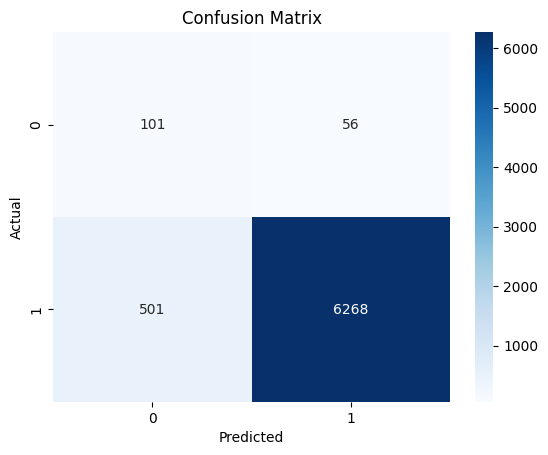

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()